In [2]:
import tensorflow as ts 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("price_house.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<Axes: xlabel='sqft_living', ylabel='price'>

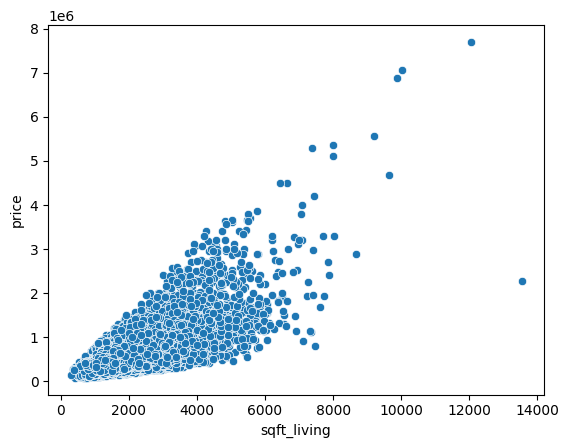

In [4]:
sns.scatterplot(x= 'sqft_living', y='price', data=df)

<Axes: >

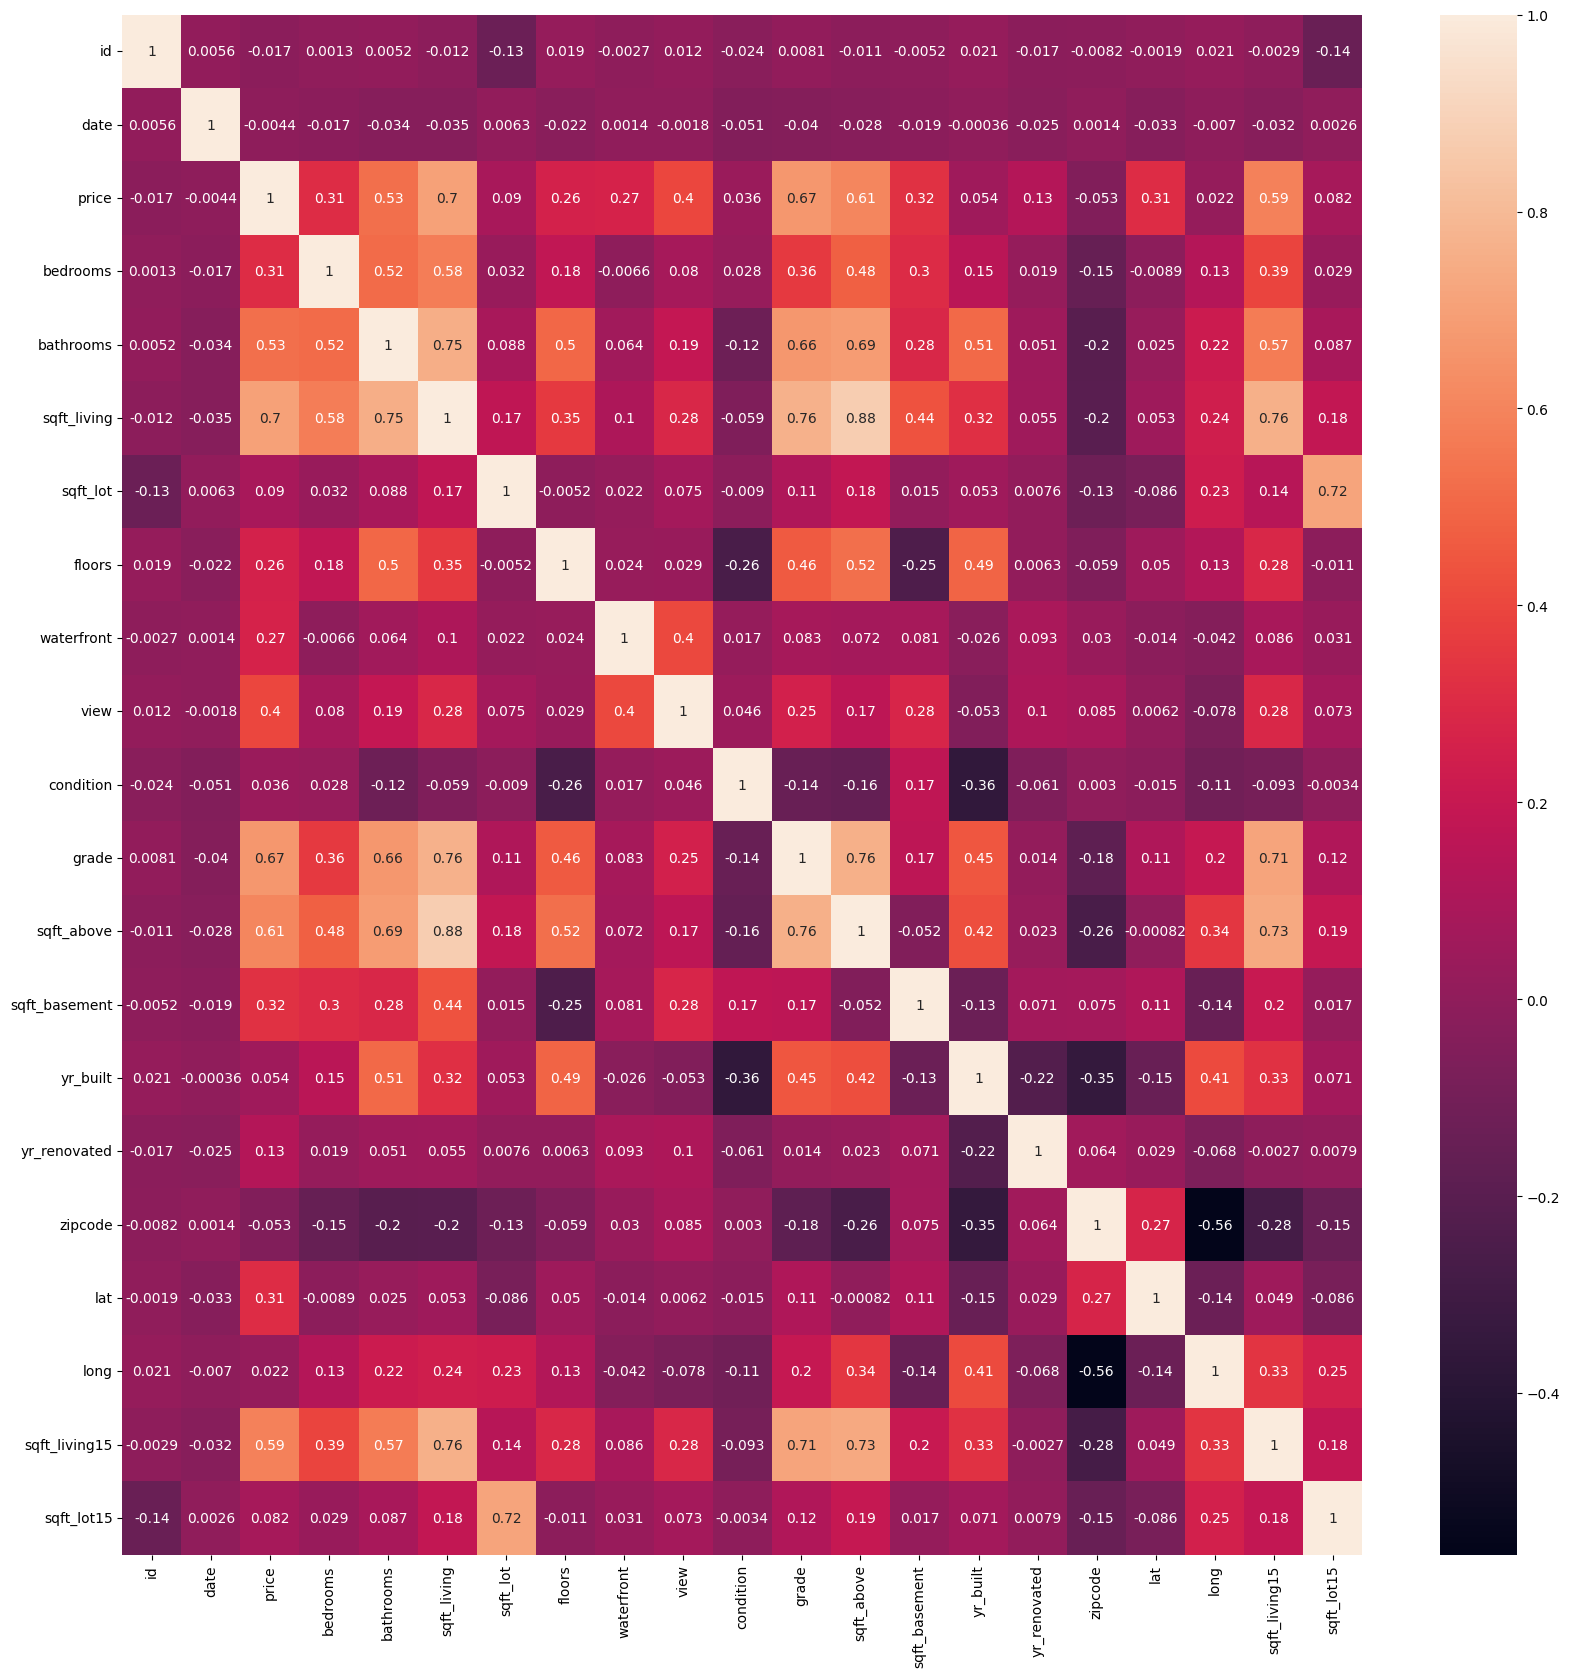

In [6]:
#corelacion 
df['date'] = pd.to_datetime(df['date'], errors='coerce')
f, ax= plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [7]:
select_features= ['bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

In [8]:
x= df[select_features]
y= df['price']

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.09090909, 0.125     , 0.06716981, ..., 0.        , 0.09758772,
        0.        ],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.4       , 0.20614035,
        0.08298755],
       [0.06060606, 0.125     , 0.03622642, ..., 0.        , 0.05263158,
        0.        ],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.4       , 0.14364035,
        0.        ],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ]])

In [10]:
#Normalizar output
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)


array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

In [11]:
#Entrenamiento

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.25)


In [13]:
#Definiendo modelo
model = ts.keras.Sequential()
model.add(ts.keras.layers.Dense(units=100, activation='relu', input_shape= (7,)))
model.add(ts.keras.layers.Dense(units=100, activation='relu'))
model.add(ts.keras.layers.Dense(units=100, activation='relu'))
model.add(ts.keras.layers.Dense(units=1, activation='linear'))
model.summary()

C:\Users\Lenovo 1\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 100)            │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,101 (82.43 KB)

 Trainable params: 21,101 (82.43 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='Adam', loss= 'mean_squared_error')
epochs_hist= model.fit(x_train, y_train, epochs=100, batch_size=50, validation_split=0.2)

Epoch 1/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 2/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 3/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 4/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.7293e-04 - val_loss: 0.0010
Epoch 5/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.7725e-04 - val_loss: 0.0010
Epoch 6/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0010 - val_loss: 9.9251e-04
Epoch 7/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 8/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.7628e-04 - val_loss: 9.9208e-04
Epoch 9/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.5397e-04 - val_loss: 9.8844e-04
Epoch 10/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.9895e-04 - val_loss: 9.7436e-04
Epoch 11/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.7689e-04 - val_loss: 0.0010
E

In [17]:
#evaluando modelo
keys = epochs_hist.history.keys()
keys

dict_keys(['loss', 'val_loss'])

C:\Users\Lenovo 1\AppData\Local\Temp\ipykernel_12576\1961004745.py:8: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('Traning loss', 'Validation loss')


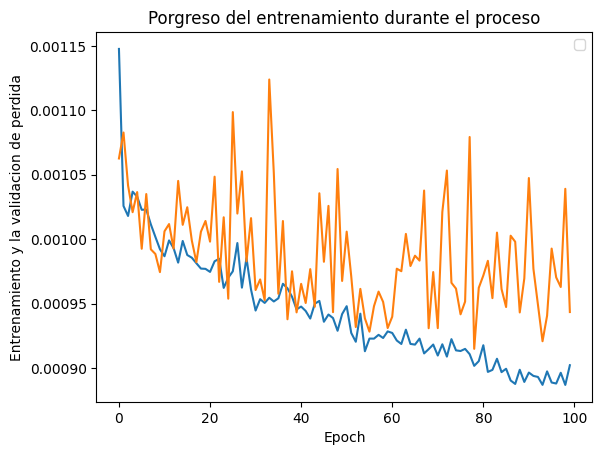

In [18]:
#Grafico de mi modelo
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title("Porgreso del entrenamiento durante el proceso")
plt.xlabel("Epoch")
plt.ylabel("Entrenamiento y la validacion de perdida")
plt.legend('Traning loss', 'Validation loss')

In [23]:
#Predicion
df2 = df[['bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']].values
id = df['id'].values

scaler_1 = MinMaxScaler()
x_test_scaled = scaler_1.fit_transform(df2)
y_predict = model.predict(x_test_scaled)
y_predict = scaler.inverse_transform(y_predict).flatten()

df_output= pd.DataFrame({
    'id': id,
    'Prices': y_predict
})

df_output.to_csv("Precios_de_casas.csv", index=False)
print("Dataframe correctamente creado.")

676/676 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Dataframe correctamente creado.
